In [38]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# Initial Thoughs & Hypothesis
## Are gene expressions in controls with dose D2 different over the time?
### Take g-0 for example: Is the g-0 expression in control with dose 2 different at 24 vs. 48 hours?
$H_0$: The average g-0 expressions in control with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average g-0 expressions in control with dose 2 are significantly different at 24 vs. 48 hours.

In [39]:
# Read csv files to dataframe

df_ctrl_d2_24 = pd.read_csv('df_ctrl_d2_24.csv', index_col=0)
df_ctrl_d2_48 = pd.read_csv('df_ctrl_d2_48.csv', index_col=0)
df_ctrl_d2_72 = pd.read_csv('df_ctrl_d2_72.csv', index_col=0)

In [3]:
# Test the assumption of equal variance by Levene's test

stats.levene(df_ctrl_d2_24['g-0'], df_ctrl_d2_48['g-0'])

# since p > 0.05, we can say that the variances are not significantly different
# set the argument in ttest_ind of equal_var to be true

LeveneResult(statistic=3.0660366167455915, pvalue=0.0804484376816337)

In [5]:
df_ctrl_d2_24['g-0'].size, df_ctrl_d2_48['g-0'].size

(305, 305)

Text(0.5, 1.0, 'Compare g-0 expressions at 24 and 48 hrs')

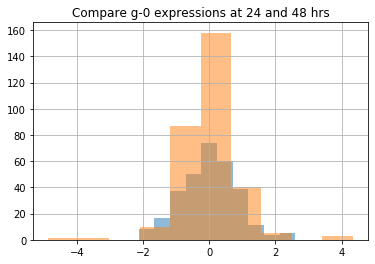

In [20]:
# Compare the histograms of the g-0 data at 24 vs. 48 hours. 

df_ctrl_d2_24['g-0'].hist(alpha=0.5)
df_ctrl_d2_48['g-0'].hist(alpha=0.5)
plt.title("Compare g-0 expressions at 24 and 48 hrs")

# The data between the 2 g-0s binned differently 

Text(0.5, 1.0, 'Compare g-0 expression at 24 and 48 hrs')

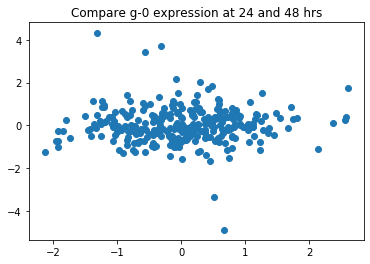

In [11]:
# Scatter plot the 2 g-0 data. 

plt.scatter(x=df_ctrl_d2_24['g-0'], y=df_ctrl_d2_48['g-0'])
plt.title("Compare g-0 expression at 24 and 48 hrs")

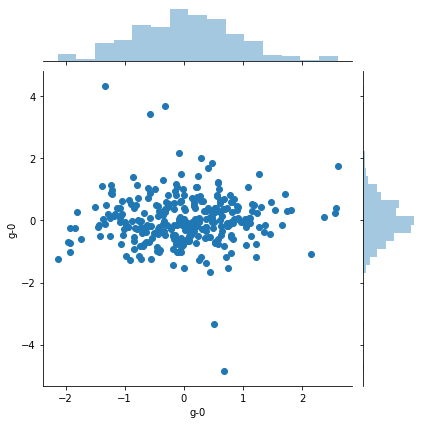

In [18]:
# Jointplot the 2 g-0 data

sns.jointplot(x=df_ctrl_d2_24['g-0'], y=df_ctrl_d2_48['g-0'])
# plt.title("Compare g-0 expression at 24 and 48 hrs")

In [16]:
# variances are equal
# t-test

stats.ttest_ind(df_ctrl_d2_24['g-0'], df_ctrl_d2_48['g-0'], equal_var=True)

# Since p > 0.05, it is fail to reject the H0.

Ttest_indResult(statistic=-0.03571110005597076, pvalue=0.9715244406896814)

### Expand to all gene expression in control with dose 2 different at 24 vs. 48 hours?
$H_0$: The average gene expressions in control with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average gene expressions in control with dose 2 are significantly different at 24 vs. 48 hours.

In [22]:
# Iterate the rest of the gene expression data

output = {}

for i in range(0, 772):
    gene = 'g-' + str(i)
    s, p = stats.levene(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene])
    if p < 0.05:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene], equal_var=False)
    else:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene], equal_var=True)
    output[gene] = p1

ctrl_24_48 = pd.Series(output)
ctrl_24_48.size

772

In [64]:
# Count how many genes are expressed differently for control group treated with does D2 
# at 24 hours vs. 48 hours
# set the alpha = 0.05

mask = (ctrl_24_48 < 0.05)
diff_g_24_48 = ctrl_24_48[mask]
diff_g_24_48.size

290

### Expand to all gene expression in control with dose 2 different at 48 vs. 72 hours?
$H_0$: The average gene expressions in control with dose 2 are the same at 48 vs. 72 hours.<br>
$H_a$: The average gene expressions in control with dose 2 are significantly different at 48 vs. 72 hours.

In [30]:
output = {}

for i in range(0, 772):
    gene = 'g-' + str(i)
    s, p = stats.levene(df_ctrl_d2_48[gene], df_ctrl_d2_72[gene])
    if p < 0.05:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_48[gene], df_ctrl_d2_72[gene], equal_var=False)
    else:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_48[gene], df_ctrl_d2_72[gene], equal_var=True)
    output[gene] = p1

ctrl_48_72 = pd.Series(output)
ctrl_48_72.size

772

In [63]:
# Count how many genes are expressed differently for control group treated with does D2 
# at 48 hours vs. 72 hours
# set the alpha = 0.05

mask = (ctrl_48_72 < 0.05)
diff_g_48_72 = ctrl_48_72[mask]
diff_g_48_72.size

261

In [56]:
diff_g_24_48.head()

g-1     2.135088e-03
g-2     2.410092e-09
g-4     4.173489e-03
g-5     1.330103e-02
g-10    8.116233e-03
dtype: float64

In [57]:
diff_g_48_72.head()

g-2     1.313885e-02
g-4     9.986158e-07
g-6     1.029790e-04
g-18    4.836402e-04
g-19    2.758921e-03
dtype: float64

In [65]:
# Convert the g-# that expressed differently to set

set_diff_g_24_48 = set(diff_g_24_48.index.tolist())
set_diff_g_48_72 = set(diff_g_48_72.index.tolist())

# Find out the intersection between the two sets

len(set_diff_g_24_48 & set_diff_g_48_72)

107

**Takeaways**
- Do I need to address the outliers in gene expression data?
- The average g-0 expressions in control with dose 2 are the same for 24 vs. 48 hours.
- In controls treated with dose 2 at 24 vs. 48 hours: 
    - 290 genes expressed significantly different.
        - caused by controls
        - caused by outliers
        - natural process, caused by cell proliferation
- In controls treated with dose 2 at 48 vs. 72 hours:
    - 261 genes expressed significantly different.
    - Compare with previous 24 vs. 48, 107 genes are in common.

## Are the viability in all cell lines in controls treated with dose D2 different over the time?
### Take c-0 for example: Treated with dose 2, is the viability in c-0 in controlds sigfinicantly different at 24 vs. 48 hours?
$H_0$: The average c-0 viablity data in controls with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average c-0 viablity data in controls with dose 2 are significantly different at 24 vs. 48 hours.

In [13]:
# Check: the viability data of df_ctrl_d2 should have 305 rows. 

df_ctrl_d2_24['c-0'].size, df_ctrl_d2_48['c-0'].size

(305, 305)

Text(0.5, 1.0, 'Compare c-0 viability at 24 and 48 hrs')

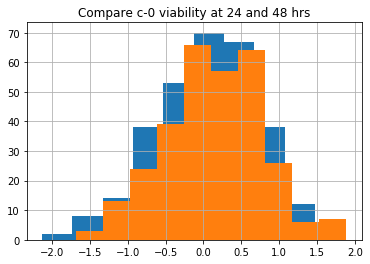

In [10]:
# Compare the distribution of the c-0 data at 24 vs. 48 hours. 

df_ctrl_d2_24['c-0'].hist()
df_ctrl_d2_48['c-0'].hist()
plt.title("Compare c-0 viability at 24 and 48 hrs")

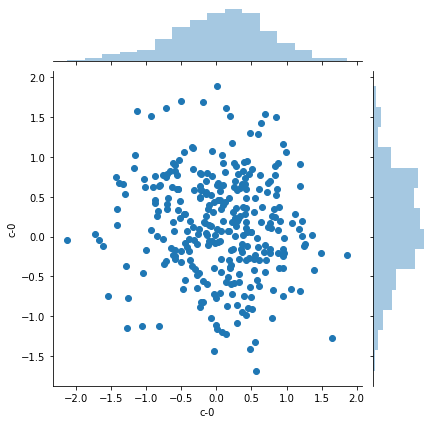

In [5]:
# Jointplot the c-0 data at 24 vs. 48 hours. 

sns.jointplot(x=df_ctrl_d2_24['c-0'], y=df_ctrl_d2_48['c-0'])
# plt.title("Compare g-0 expression at 24 and 48 hrs")

In [11]:
# Test the assumption of equal variance by Levene's test

stats.levene(df_ctrl_d2_24['c-0'], df_ctrl_d2_48['c-0'])

# since p > 0.05, we can say that the variances are not significantly different
# set the argument in ttest_ind of equal_var to be true

LeveneResult(statistic=0.17198316441562886, pvalue=0.6785015699903569)

In [12]:
# variances are equal
# t-test

stats.ttest_ind(df_ctrl_d2_24['c-0'], df_ctrl_d2_48['c-0'], equal_var=True)

# Since p > 0.05, it is fail to reject the H0.

Ttest_indResult(statistic=-1.833376733131924, pvalue=0.06723527624790276)

### Expand to all cell viability data in control with dose 2 different at 24 vs. 48 hours?
$H_0$: The average viability in all cell lines in control with dose 2 are the same at 24 vs. 48 hours.<br>
$H_a$: The average viability in all cell lines in control with dose 2 are significantly different at 24 vs. 48 hours.

In [26]:
# Iterate the rest of the gene expression data

output_s = {}
output_p = {}

for i in range(0, 100):
    cell = 'c-' + str(i)
    s, p = stats.levene(df_ctrl_d2_24[cell], df_ctrl_d2_48[cell])
    if p < 0.05:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[cell], df_ctrl_d2_48[cell], equal_var=False)
    else:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[cell], df_ctrl_d2_48[cell], equal_var=True)
    output_s[cell] = s1
    output_p[cell] = p1

ctrl_24_48_c = pd.Series(output_p)
ctrl_24_48_c.size

100

In [16]:
# Count how many genes are expressed differently for control group treated with does D2 
# at 24 hours vs. 48 hours
# set the alpha = 0.05

mask = (ctrl_24_48_c < 0.05)
diff_c_24_48 = ctrl_24_48_c[mask]
diff_c_24_48.size

36

**Takeaways**:
1. 36 cell lines have significalty different viability in controls treated with dose 2 at 24 vs. 48 hours. 
    - Waht does this indicate? 
        - Healthy vs. Cancer, for example

In [37]:
# By observation, cell line 42 has the smalllest value of p-value

diff_c_24_48.loc['c-42']

4.3580138827153873e-07

Text(0.5, 1.0, 'Compare c-42 viability at 24 and 48 hrs')

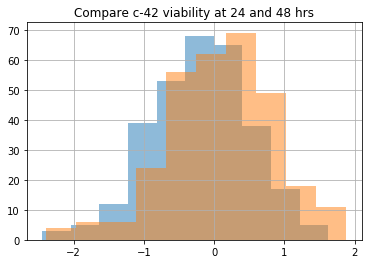

In [36]:
# Compare the distribution of the c-42 data at 24 vs. 48 hours. 

df_ctrl_d2_24['c-42'].hist(alpha=0.5)
df_ctrl_d2_48['c-42'].hist(alpha=0.5)
plt.title("Compare c-42 viability at 24 and 48 hrs")

## Are genes' expression in one observation normalized?
According to the literature, they are. 

mean      0.167008
median    0.227750
Name: id_90a774a1a, dtype: float64


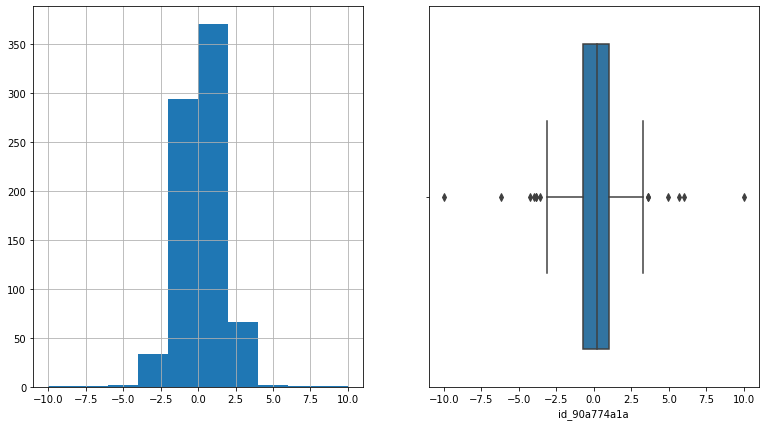

In [84]:
# Visualize gene expression data in one random sample

id_random = df_ctrl_d2_24.sample(1)

# subset the gene expression data only

mask_g = id_random.columns.str.contains('g-')
id_random_g = id_random.T[mask_g].iloc[:, 0]

# Print out mean, median and mode of the dataset

print(id_random_g.agg(['mean', 'median']))

# Visualize the distribution and boxplot of the gene expression

plt.figure(figsize=(13,7))

plt.subplot(121)
id_random_g.hist()

plt.subplot(122)
sns.boxplot(id_random_g)

### Do the control pertubagen use the same cont